In [21]:
import pandas as pd
import numpy as np
import datetime
import collections
from dateutil.parser import parse
from collections import Counter, OrderedDict
from nltk.util import ngrams
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


# pandas options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

In [22]:
# open pickled file
df = pd.read_pickle("./Cleaned_RT_News.pkl")

# drop empty articles: Convert NaN values to empty string
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Cleaned Article"], inplace=True)

# drop uncleaned rows
df = df.drop(751)


In [23]:
# extend orginal df with columns about statistical properties of different topics/categories
columns = ['Word Count', 'Time','Date', 'BoW', 'Trigrams']
       
df = pd.concat([df,pd.DataFrame(columns=columns)])

In [24]:
# class ArticleStats has different methods:
# - word count: counts the words of an article
# - get_date: gets the publishing date of the article
# - get_time: gets the publishing date of the article
# - get_bow: creates a bag of words dict out of each article
# - get_trigrams: creates trigrams from article and stores them in a list

class ArticleStats:
    def __init__(self, df_data):
        self.df_data = df_data

    def word_count(self):
        
        # word count based on the cleaned article
        cleaned_article = self.df_data
        article_word_count = len(cleaned_article.split())
        return article_word_count
    
    def get_date(self):
        
        # time and date: clean, parse, extract
        date_time = self.df_data
        cleaned_date_time = date_time.replace('•', '').replace('Uhr', '')
        
        parse_date = parse(cleaned_date_time)
        
        date = parse_date.date()
        return date
    
    def get_time(self):
        
        # time and date: clean, parse, extract
        date_time = self.df_data
        cleaned_date_time = date_time.replace('•', '').replace('Uhr', '') 
        
        parse_time = parse(cleaned_date_time)
        
        time = parse_time.time()
        return time
    
    def get_bow(self):
        
        lemmas = self.df_data
        
        # Bow: counts word occurences, and returns ordered dictionary beginning with the most common
        bow = OrderedDict(Counter(lemmas).most_common())
        return bow
    
        
    def get_trigrams(self):
        
        cleaned_article = self.df_data
        
        # stores trigrams in a list
        trigrams_list = list(ngrams(cleaned_article.split(), 3))
        return trigrams_list


# apply ArticleStats methods to each row/article                 
df['Word Count'] = df['Cleaned Article'].apply(lambda row: ArticleStats(row).word_count())
df['Date'] = df['Date Published'].apply(lambda row: ArticleStats(row).get_date())
df['Time'] = df['Date Published'].apply(lambda row: ArticleStats(row).get_time()) 
df['BoW'] = df['Lemmas'].apply(lambda row: ArticleStats(row).get_bow()) 
df['Trigrams'] = df['Cleaned Article'].apply(lambda row: ArticleStats(row).get_trigrams()) 

df

,News Site,Category,Article Title,Date Published,Article,Cleaned Article,No Stopwords,Tokens,Lemmas,Word Count,Time,Date,BoW,Trigrams
0,https://deutsch.rt.com,gesellschaft,"""Schande für alle Künstler"" oder nicht radikal...",10.09.2020 • 22:07 Uhr,Mit einer neuen Reihe von Inklusionsnormen für...,Mit einer neuen Reihe von Inklusionsnormen für...,neuen Reihe Inklusionsnormen künftige OscarVer...,"[neuen, Reihe, Inklusionsnormen, künftige, Osc...","[neu, Reihe, Inklusionsnormen, künftig, OscarV...",943,22:07:00,2020-10-09,"{'Film': 13, 'neu': 11, 'Standard': 5, 'erfüll...","[(Mit, einer, neuen), (einer, neuen, Reihe), (..."
1,https://deutsch.rt.com,gesellschaft,Russischer Journalistenverband würdigt Julian ...,9.09.2020 • 19:40 Uhr,Der Verband der Journalisten Russlands hat am ...,Der Verband der Journalisten Russlands hat am ...,Verband Journalisten Russlands Dienstag austra...,"[Verband, Journalisten, Russlands, Dienstag, a...","[Verband, Journalist, Russlands, Dienstag, aus...",342,19:40:00,2020-09-09,"{'Journalist': 9, 'Julian': 4, 'Assange': 4, '...","[(Der, Verband, der), (Verband, der, Journalis..."
2,https://deutsch.rt.com,gesellschaft,Digitaler Nachlass: Gericht erlaubt Entsperrun...,9.09.2020 • 11:26 Uhr,Im Streit um das digitale Erbe des Mädchens mu...,Im Streit um das digitale Erbe des Mädchens mu...,Streit digitale Erbe Mädchens soziale Netzwerk...,"[Streit, digitale, Erbe, Mädchens, soziale, Ne...","[Streit, digitale, Erbe, Mädchen, soziale, Net...",223,11:26:00,2020-09-09,"{'Facebook': 5, 'Eltern': 5, 'Erbe': 3, 'Mädch...","[(Im, Streit, um), (Streit, um, das), (um, das..."
3,https://deutsch.rt.com,gesellschaft,Menschen mit Behinderung meist ohne Job: Inklu...,7.09.2020 • 16:58 Uhr,Das Unternehmen beschäftigt und bildet Mensche...,Das Unternehmen beschäftigt und bildet Mensche...,Unternehmen beschäftigt bildet Menschen Behind...,"[Unternehmen, beschäftigt, bildet, Menschen, B...","[Unternehmen, beschäftigen, bilden, Mensch, Be...",36,16:58:00,2020-07-09,"{'Unternehmen': 2, 'Mensch': 2, 'Behinderung':...","[(Das, Unternehmen, beschäftigt), (Unternehmen..."
4,https://deutsch.rt.com,gesellschaft,Papst warnt vor größerer Gefahr als Corona: Ge...,7.09.2020 • 11:24 Uhr,Geschwätz ist eine schlimmere Plage als Covid ...,Geschwätz ist eine schlimmere Plage als Covid ...,Geschwätz schlimmere Plage Covid sagte jährige...,"[Geschwätz, schlimmere, Plage, Covid, sagte, j...","[Geschwätz, schlimm, Plage, Covid, sagen, jähr...",136,11:24:00,2020-07-09,"{'Kirche': 4, 'sagen': 3, 'Geschwätz': 2, 'Feh...","[(Geschwätz, ist, eine), (ist, eine, schlimmer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,https://deutsch.rt.com,russland,Russland: Auch am Wochenende Massenproteste in...,20.07.2020 • 16:42 Uhr,Gouverneur Sergei Furgal wurde am . Juli festg...,Gouverneur Sergei Furgal wurde am Juli festge...,Gouverneur Sergei Furgal wurde Juli festgenomm...,"[Gouverneur, Sergei, Furgal, wurde, Juli, fest...","[Gouverneur, Sergei, Furgal, werden, Juli, fes...",229,16:42:00,2020-07-20,"{'Furgal': 7, 'Gouverneur': 4, 'Jahr': 4, 'Mos...","[(Gouverneur, Sergei, Furgal), (Sergei, Furgal..."
1076,https://deutsch.rt.com,russland,FSB vereitelt Terroranschlag im Fernen Osten R...,17.07.2020 • 17:23 Uhr,Ein Staatsbürger eines zentralasiatischen Staa...,Ein Staatsbürger eines zentralasiatischen Staa...,Staatsbürger zentralasiatischen Staates Geburt...,"[Staatsbürger, zentralasiatischen, Staates, Ge...","[Staatsbürger, zentralasiatischen, Staat, Gebu...",124,17:23:00,2020-07-17,"{'Terrororganisation': 2, 'Anschlag': 2, 'FSB'...","[(Ein, Staatsbürger, eines), (Staatsbürger, ei..."
1077,https://deutsch.rt.com,russland,"Russland: ""Unsterbliches Regiment"" wegen Coron...",17.07.2020 • 10:33 Uhr,Der Gedenkmarsch wurde dieses Jahr schon einma...,Der Gedenkmarsch wurde dieses Jahr schon einma...,Gedenkmarsch wurde Jahr schon Mai Juli verscho...,"[Gedenkmarsch, wurde, Jahr, schon, Mai, Juli, ...","[Gedenkmarsch, werden, Jahr, schon, Mai, J

In [25]:
# subset df to only contain stats + category
df_stats = df[['Category','Word Count', 'Time','Date', 'BoW', 'Trigrams']]

In [26]:
# the Summarize class collapses BoW dictionaties and Trigram lists for each category
  
class Summarize:
    def __init__(self,df_data):
        self.df_data = df_data
     
    def sum_bow(self):
        
        # make a dictionary to collect data from all rows of a category
        bow_dict = {}
        
        # iterate through rows
        for ordered_dict in self.df_data:
        
            # check if word is already in common_dict
            for k, v in ordered_dict.items():

                # if not, add word and word count
                if k not in bow_dict:
                    bow_dict[k] = v

                # if yes, add word count to existing key/word
                else:
                    bow_dict[k] += v
                    
                    
        # return dictionary
        return bow_dict
    
    
    def sum_trigrams(self):
        
        # make a list to collect data from all rows of a category
        trigrams_list = []

        # iterate through rows of df
        for trigram in self.df_data:
            
            # append trigram to list
            trigrams_list.append(trigram)
    
        #flatten list  
        trigrams_list = sum(trigrams_list, [])
        
        # returns a list of all trigrams within one category
        return trigrams_list
        


    
# make 2 new dataframes for BoW and Trigrams
columns_bow = ['Category','Most common word','Count Word']
columns_trigram = ['Category','Most common trigram','Count Trigram']

bow_df = pd.DataFrame(columns=columns_bow)
trigram_df = pd.DataFrame(columns=columns_trigram)


# iterate through the rows of the 10 categories and apply class methods
for category in df['Category'].unique():
    
    # list of bows for one category
    bow_dict = Summarize(df_stats[df_stats['Category']==category]['BoW']).sum_bow()
    
    # get the most common 20 bows for one category
    most_common_bow = dict(Counter(bow_dict).most_common(20))
    
    # list of trigram for one category
    trigrams = Summarize(df_stats[df_stats['Category']==category]['Trigrams']).sum_trigrams()
    
    # get the most common 20 trigrams for one category
    most_common_tri = dict(Counter(trigrams).most_common(20))

    
    # append bows, counts, and category to list and fill df row-wise
    for k, v in most_common_bow.items():
        list_bow_info = []
        list_bow_info.append(category)
        list_bow_info.append(k)
        list_bow_info.append(v)
        
        bow_df.loc[len(bow_df)] = list_bow_info
        
    # append trigrams, counts, and category to list and fill df row-wise    
    for k1, v1 in most_common_tri.items():
        list_trigram_info = []
        list_trigram_info.append(category)
        list_trigram_info.append(' '.join([str(x) for x in k1]))
        list_trigram_info.append(v1)
                
        trigram_df.loc[len(trigram_df)] = list_trigram_info



In [27]:
trigram_df

,Category,Most common trigram,Count Trigram
0,gesellschaft,in den USA,15
1,gesellschaft,so der Ausschuss,12
2,gesellschaft,in der CoronaKrise,9
3,gesellschaft,Das ist eine,8
4,gesellschaft,dass es sich,8
...,...,...,...
195,russland,unter Berufung auf,7
196,russland,der Nachrichtenagentur TASS,7
197,russland,der russischen Generalstaatsanwaltschaft,6
198,russland,im Fall Nawalny,6


In [28]:
bow_df

,Category,Most common word,Count Word
0,gesellschaft,sein,464
1,gesellschaft,werden,281
2,gesellschaft,geben,238
3,gesellschaft,Jahr,163
4,gesellschaft,Mensch,153
...,...,...,...
195,russland,deutsch,60
196,russland,Mensch,59
197,russland,mehr,58
198,russland,erst,58


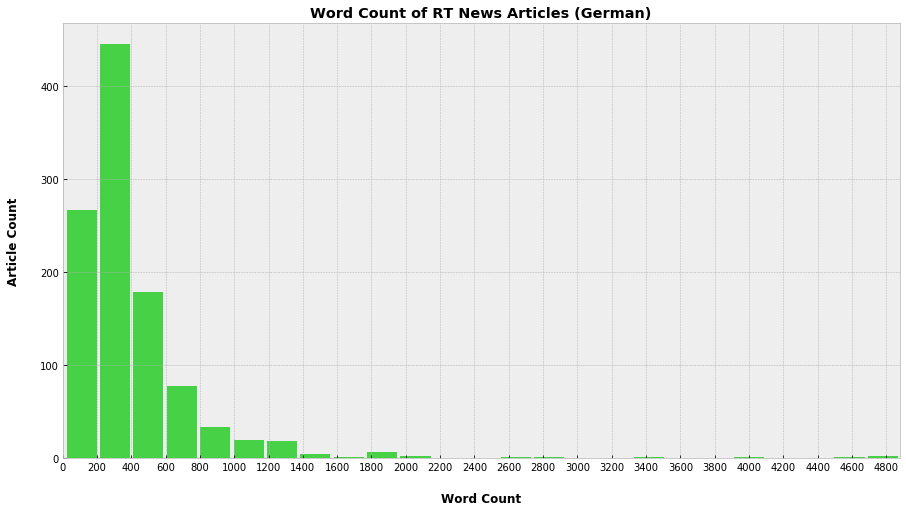

In [29]:
# Visualize word count of RT News Articles

plt.style.use('bmh')

# data to be used
word_count = df_stats['Word Count']

# make plot
plt.hist(word_count, bins=25, rwidth=0.9, color = '#47d147')
plt.gcf().set_size_inches(15, 8)

# labels, colors, axes
plt.title('Word Count of RT News Articles (German)', fontweight='bold')
plt.xlabel('Word Count', fontweight='bold', labelpad=20)
plt.ylabel('Article Count', fontweight='bold', labelpad=20)
plt.xlim(xmin=min(word_count), xmax = max(word_count))
plt.xticks(np.arange(0,5000, step=200))
plt.show()



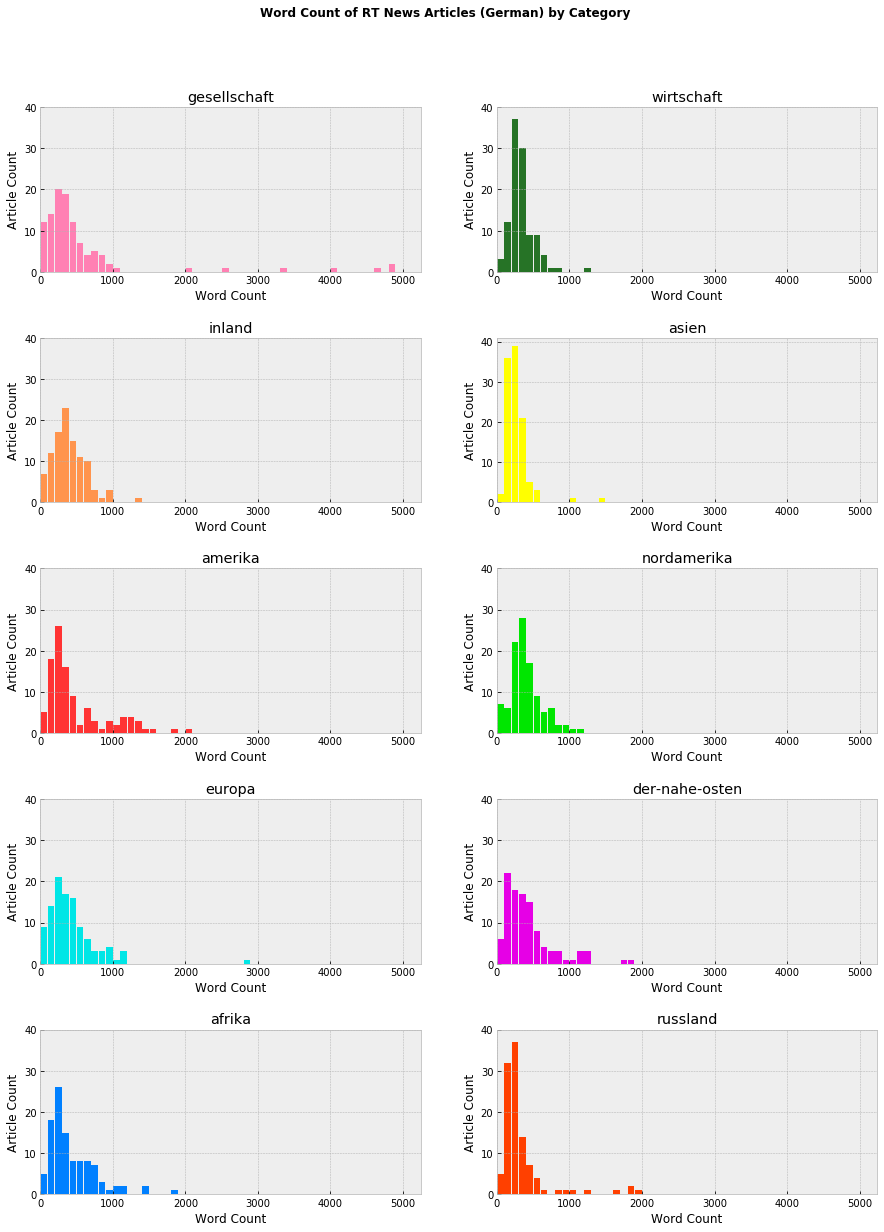

In [30]:
# Visualize: word count by category

# data
gesellschaft = df_stats[df_stats['Category']=='gesellschaft']['Word Count']
wirtschaft = df_stats[df_stats['Category']=='wirtschaft']['Word Count']
inland = df_stats[df_stats['Category']=='inland']['Word Count']
asien = df_stats[df_stats['Category']=='asien']['Word Count']
amerika = df_stats[df_stats['Category']=='amerika']['Word Count']
nordamerika = df_stats[df_stats['Category']=='nordamerika']['Word Count']
europa = df_stats[df_stats['Category']=='europa']['Word Count']
der_nahe_osten = df_stats[df_stats['Category']=='der-nahe-osten']['Word Count']
afrika = df_stats[df_stats['Category']=='afrika']['Word Count']
russland = df_stats[df_stats['Category']=='russland']['Word Count']

# plot style
plt.style.use('bmh')
n_bins = 50
labels = [category for category in df_stats['Category'].unique()]

# create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4)
fig.suptitle('Word Count of RT News Articles (German) by Category', fontweight='bold', y=0.95)

# make subplots
axs[0, 0].hist(gesellschaft, rwidth=0.9, bins=n_bins, color = '#ff80b3', range=(0,5000))
axs[0, 1].hist(wirtschaft, rwidth=0.9, bins=n_bins, color = '#267326', range=(0,5000))
axs[1, 0].hist(inland, bins=n_bins, rwidth=0.9, color = '#ff944d', range=(0,5000))
axs[1, 1].hist(asien, bins=n_bins, rwidth=0.9, color = '#ffff00', range=(0,5000))
axs[2, 0].hist(amerika, bins=n_bins, rwidth=0.9, color = '#ff3333', range=(0,5000))
axs[2, 1].hist(nordamerika, bins=n_bins, rwidth=0.9, color = '#00e600', range=(0,5000))
axs[3, 0].hist(europa, bins=n_bins, rwidth=0.9, color = '#00e6e6',range=(0,5000))
axs[3, 1].hist(der_nahe_osten, bins=n_bins, rwidth=0.9, color = '#e600e6', range=(0,5000))
axs[4, 0].hist(afrika, bins=n_bins, rwidth=0.9, color = '#0080ff',range=(0,5000))
axs[4, 1].hist(russland, bins=n_bins, rwidth=0.9, color = '#ff4000', range=(0,5000))


# iterate over subplots and set sub-title, axes-labels, axes-limits
i = 0
for ax in axs.flat:
    
    # label
    ax.set(xlabel='Word Count', ylabel='Article Count')
    
    #limit
    ax.set_xlim(xmin=0)
    
    #yticks
    ax.set_yticks(np.arange(0,50, step=10))
    
    # titles
    current = labels[i]
    ax.set_title(current)
    i += 1


plt.show()


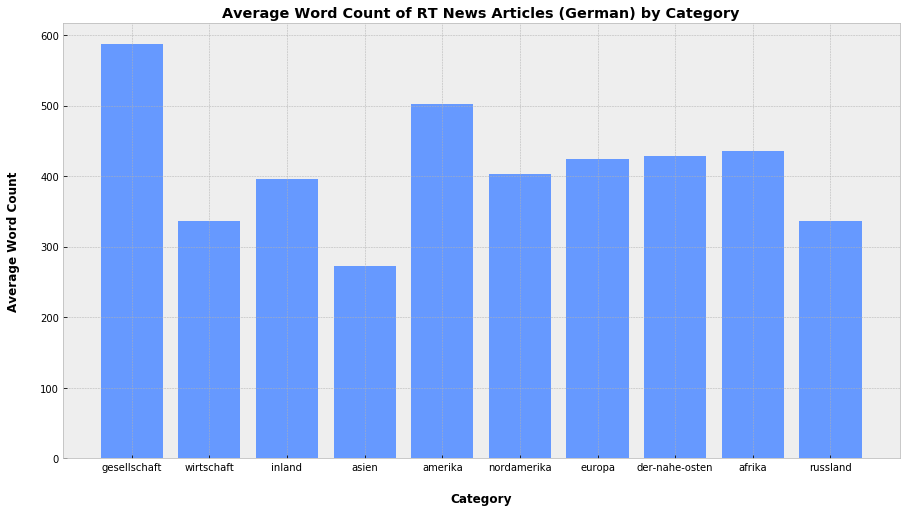

In [31]:
# Visualize: average word count by category

plt.style.use('bmh')


# extract average word count + categories from df_stats and append to list
category_list = df_stats['Category'].unique()

means =[]
categories= []

for category in category_list:
    mean = df[df_stats['Category']==category]['Word Count'].mean()
    means.append(mean)
    categories.append(category)
  


# make plot
plt.bar(categories, means, color = '#6699ff')
plt.gcf().set_size_inches(15, 8)

# labels, colors, xticks
plt.title('Average Word Count of RT News Articles (German) by Category', fontweight='bold')
plt.xlabel('Category', fontweight='bold', labelpad=20)
plt.ylabel('Average Word Count', fontweight='bold', labelpad=20)



plt.show()


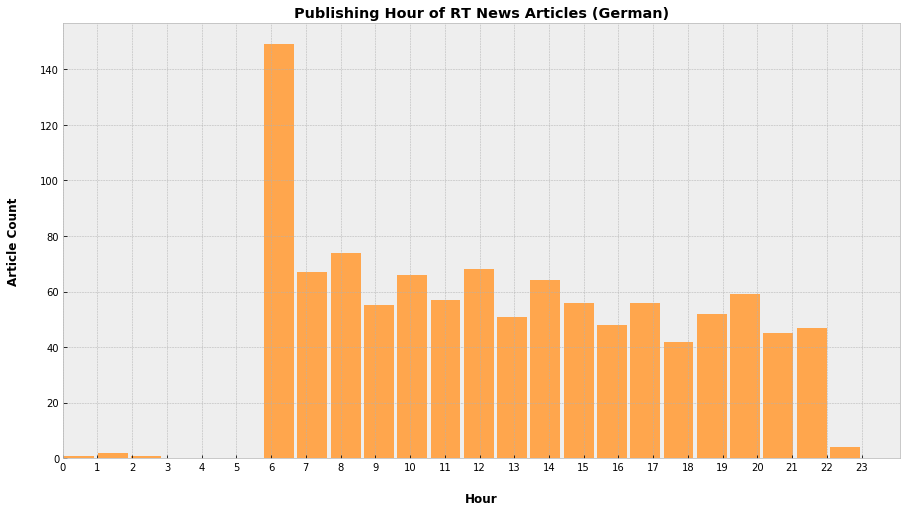

In [32]:
# Visualize: time of publication 

plt.style.use('bmh')

# data to be used
hour = pd.to_datetime(df_stats['Time'], format='%H:%M:%S').dt.hour

# make plot
plt.hist(hour, bins=24, rwidth=0.9, color = '#ffa64d')
plt.gcf().set_size_inches(15, 8)

# labels, colors, axes
plt.title('Publishing Hour of RT News Articles (German)', fontweight='bold')
plt.xlabel('Hour', fontweight='bold', labelpad=20)
plt.ylabel('Article Count', fontweight='bold', labelpad=20)
plt.xticks(np.arange(0,24, step=1))
plt.xlim(xmin=0)

plt.show()



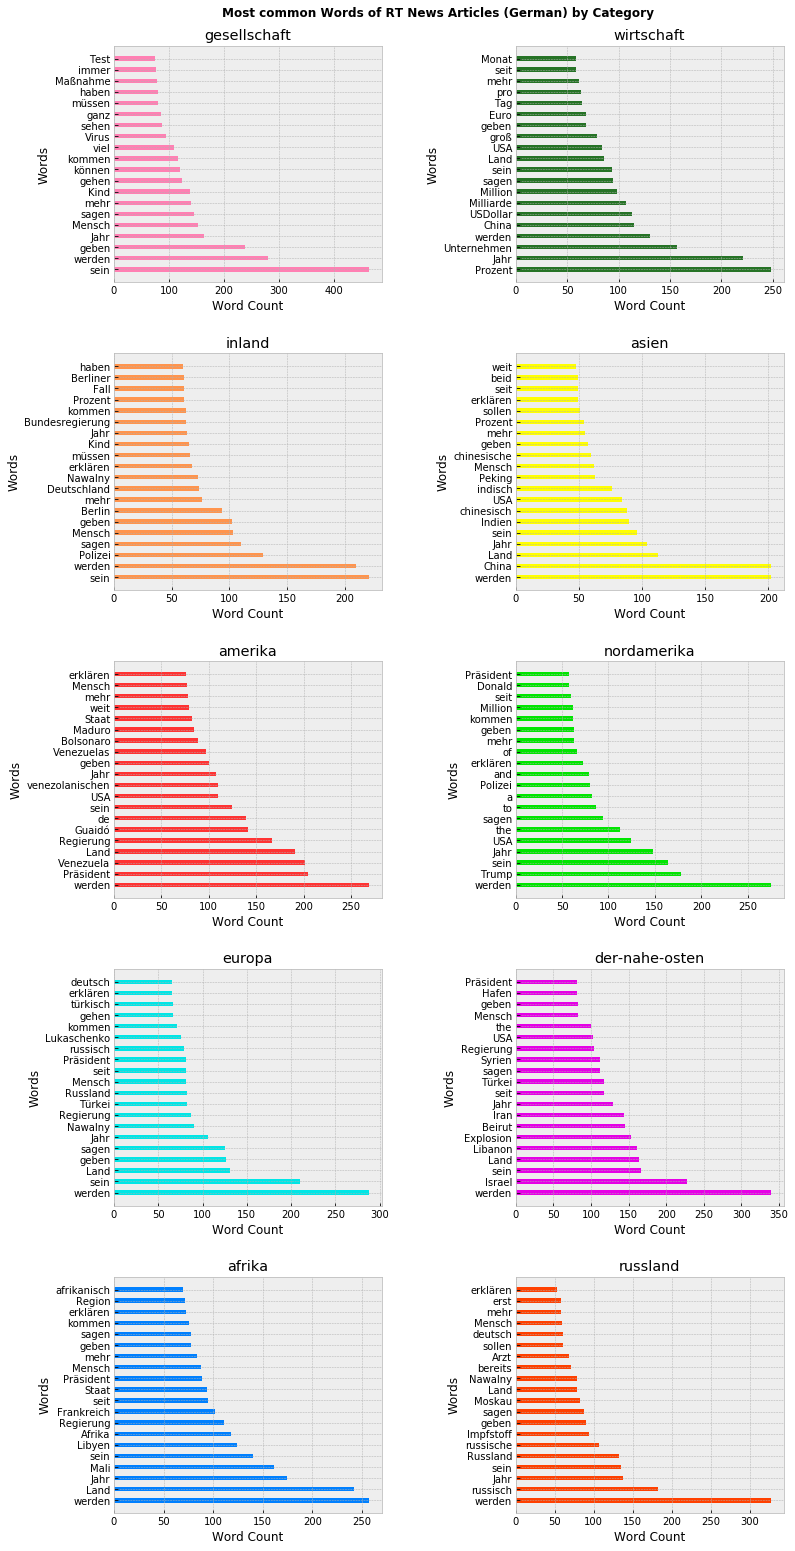

In [33]:
# Viualize: Bag-of-words by category

# data
gesellschaft = bow_df[bow_df['Category'] == 'gesellschaft']
wirtschaft = bow_df[bow_df['Category'] == 'wirtschaft']
inland =  bow_df[bow_df['Category'] == 'inland']
asien =  bow_df[bow_df['Category'] == 'asien']
amerika =  bow_df[bow_df['Category'] == 'amerika']
nordamerika = bow_df[bow_df['Category'] == 'nordamerika']
europa =  bow_df[bow_df['Category'] == 'europa']
der_nahe_osten =  bow_df[bow_df['Category'] == 'der-nahe-osten']
afrika =  bow_df[bow_df['Category'] == 'afrika']
russland =  bow_df[bow_df['Category'] == 'russland']

# plot style + labels for subplots
plt.style.use('bmh')
labels = [category for category in df_stats['Category'].unique()]

# make subplots
fig, axs = plt.subplots(5,2)
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)
fig.suptitle('Most common Words of RT News Articles (German) by Category', fontweight='bold', y=0.9)
fig.set_figheight(27)
fig.set_figwidth(12)

axs[0, 0].barh(gesellschaft['Most common word'], gesellschaft['Count Word'], color = '#ff80b3', height=0.4)
axs[0, 1].barh(wirtschaft['Most common word'], wirtschaft['Count Word'], color = '#267326', height=0.4)
axs[1, 0].barh(inland['Most common word'], inland['Count Word'], color = '#ff944d', height=0.4)
axs[1, 1].barh(asien['Most common word'], asien['Count Word'],  color = '#ffff00', height=0.4)
axs[2, 0].barh(amerika['Most common word'], amerika['Count Word'], color = '#ff3333', height=0.4)
axs[2, 1].barh(nordamerika['Most common word'], nordamerika['Count Word'], color = '#00e600', height=0.4)
axs[3, 0].barh(europa['Most common word'], europa['Count Word'], color = '#00e6e6', height=0.4)
axs[3, 1].barh(der_nahe_osten['Most common word'], der_nahe_osten['Count Word'], color = '#e600e6', height=0.4)
axs[4, 0].barh(afrika['Most common word'], afrika['Count Word'], color = '#0080ff', height=0.4)
axs[4, 1].barh(russland['Most common word'], russland['Count Word'], color = '#ff4000', height=0.4)


# iterate over subplots and set sub-title, axes-labels, axes-limits
i = 0

for ax in axs.flat:
    # label
    ax.set(xlabel='Word Count', ylabel='Words')
    
    #limit
    ax.set_xlim(xmin=0)
    
    #subtitle
    current = labels[i]
    ax.set_title(current)
    i += 1
    
plt.show()


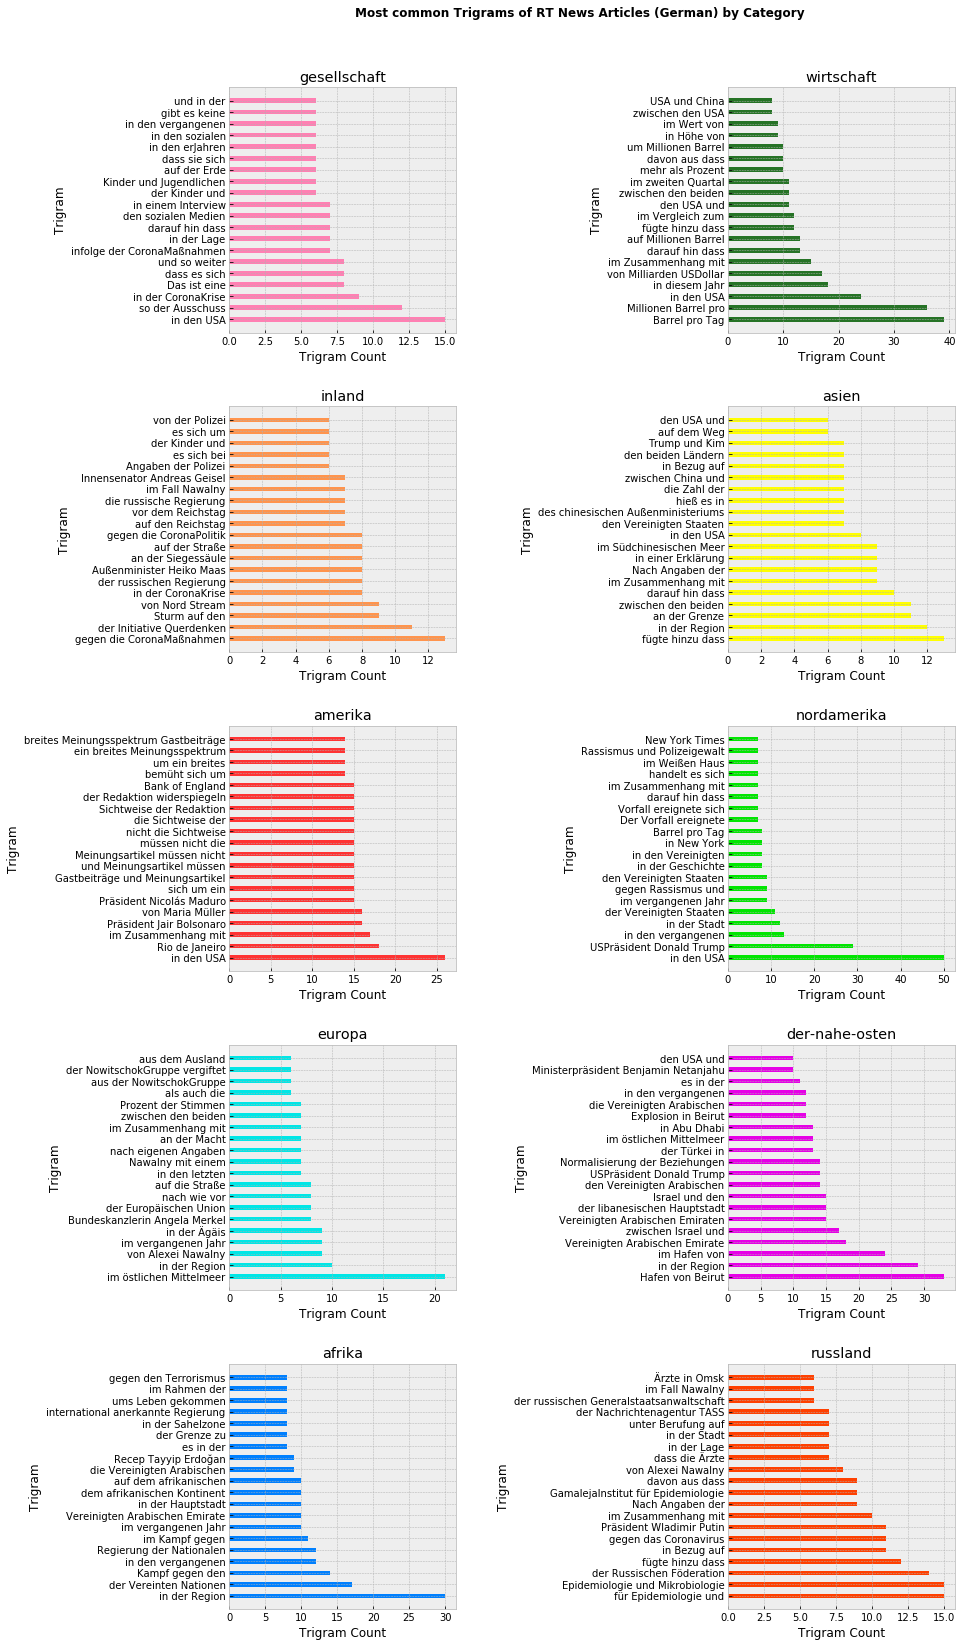

In [34]:
# Visualize: most common trigrams of each category

# data
gesellschaft = trigram_df[trigram_df['Category'] == 'gesellschaft']
wirtschaft = trigram_df[trigram_df['Category'] == 'wirtschaft']
inland =  trigram_df[trigram_df['Category'] == 'inland']
asien =  trigram_df[trigram_df['Category'] == 'asien']
amerika =  trigram_df[trigram_df['Category'] == 'amerika']
nordamerika = trigram_df[trigram_df['Category'] == 'nordamerika']
europa =  trigram_df[trigram_df['Category'] == 'europa']
der_nahe_osten =  trigram_df[trigram_df['Category'] == 'der-nahe-osten']
afrika =  trigram_df[trigram_df['Category'] == 'afrika']
russland =  trigram_df[trigram_df['Category'] == 'russland']


# plot style, labels for subplots
plt.style.use('bmh')
labels = [category for category in df_stats['Category'].unique()]

# make subplots
fig, axs = plt.subplots(5,2)
plt.subplots_adjust(hspace = 0.3, wspace = 1.2)
fig.suptitle('Most common Trigrams of RT News Articles (German) by Category', fontweight='bold', y=0.92)
fig.set_figheight(28)
fig.set_figwidth(13)

axs[0, 0].barh(gesellschaft['Most common trigram'], gesellschaft['Count Trigram'], color = '#ff80b3', height=0.4)
axs[0, 1].barh(wirtschaft['Most common trigram'], wirtschaft['Count Trigram'], color = '#267326', height=0.4)
axs[1, 0].barh(inland['Most common trigram'], inland['Count Trigram'], color = '#ff944d', height=0.4)
axs[1, 1].barh(asien['Most common trigram'], asien['Count Trigram'],  color = '#ffff00', height=0.4)
axs[2, 0].barh(amerika['Most common trigram'], amerika['Count Trigram'], color = '#ff3333', height=0.4)
axs[2, 1].barh(nordamerika['Most common trigram'], nordamerika['Count Trigram'], color = '#00e600', height=0.4)
axs[3, 0].barh(europa['Most common trigram'], europa['Count Trigram'], color = '#00e6e6', height=0.4)
axs[3, 1].barh(der_nahe_osten['Most common trigram'], der_nahe_osten['Count Trigram'], color = '#e600e6', height=0.4)
axs[4, 0].barh(afrika['Most common trigram'], afrika['Count Trigram'], color = '#0080ff', height=0.4)
axs[4, 1].barh(russland['Most common trigram'], russland['Count Trigram'], color = '#ff4000', height=0.4)


# iterate over subplots and set sub-title, axes-labels, axes-limits
i = 0

for ax in axs.flat:
    # label
    ax.set(xlabel='Trigram Count', ylabel='Trigram')
    
    #limit
    ax.set_xlim(xmin=0)
    
    #subtitle
    current = labels[i]
    ax.set_title(current)
    i += 1
    
plt.show()